## **Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation**

### Name: Syed Muzammil Syed Riyaz Ahamed
### Student Id: 9012161
### Section: 2

### **Objective:**

##### To build a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk.

### **Importing Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from typing import List
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#### **Source:**

##### Most of the code were referred from the below sources:

- ##### [polynomial_regression.ipynb](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/polynomial_regression/polynomial_regression.ipynb)
- ##### [decision_trees.ipynb](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/decision_trees/decision_trees.ipynb)

### **PART 1:**

#### **1. Get the Data:**

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

#### **2. Framing a Problem:**

##### This is a regression problem since the objective is to predict continuous outcomes. The forecast has to be on "disease progression one year after baseline" about diabetes patients. The data are obtained from the dataset diabetes, which involves 10 quantitative features collected from patients. These will further be used as independent variables or, more correctly put, predictors against a target variable which is continuous in nature and numerical in value to predict disease progression.

- ##### Type of Problem: Regression
- ##### Objective: Predict the degree of diabetes progression one year after the baseline (continuous variable).

#### **3. Exploratory Data Analysis:**

#### **Features (Independent Variables):**
##### We will use a dataset of 10 features, each representing physiological measures of given patients:

- ##### Age
- ##### Sex
- ##### Body Mass Index
- ##### Average Blood Pressure
- ##### Blood serum measure: Six measures: S1 to S6

##### These features are going to be used to build a model that would predict the disease progression of diabetes.

##### **Target (Dependent Variable):**
##### y: Disease progression one year after the baseline is a continuous variable. So, to find such patterns in relationship of features X and target variable y in order to make correct predictions about the future course of a disease.

#### **Statistics:**

##### The dataset includes 442 observations with the following statistics for each feature and the target variable:

In [4]:
class Statistics:

    def stats(df):
        statistics = df.describe()
        return statistics

stats = Statistics
df = pd.DataFrame(data=X, columns=diabetes.feature_names)
df['target'] = y
stats.stats(df)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


#### **Scatter Plots:**

##### To visualize relationships between the features and the target variable:

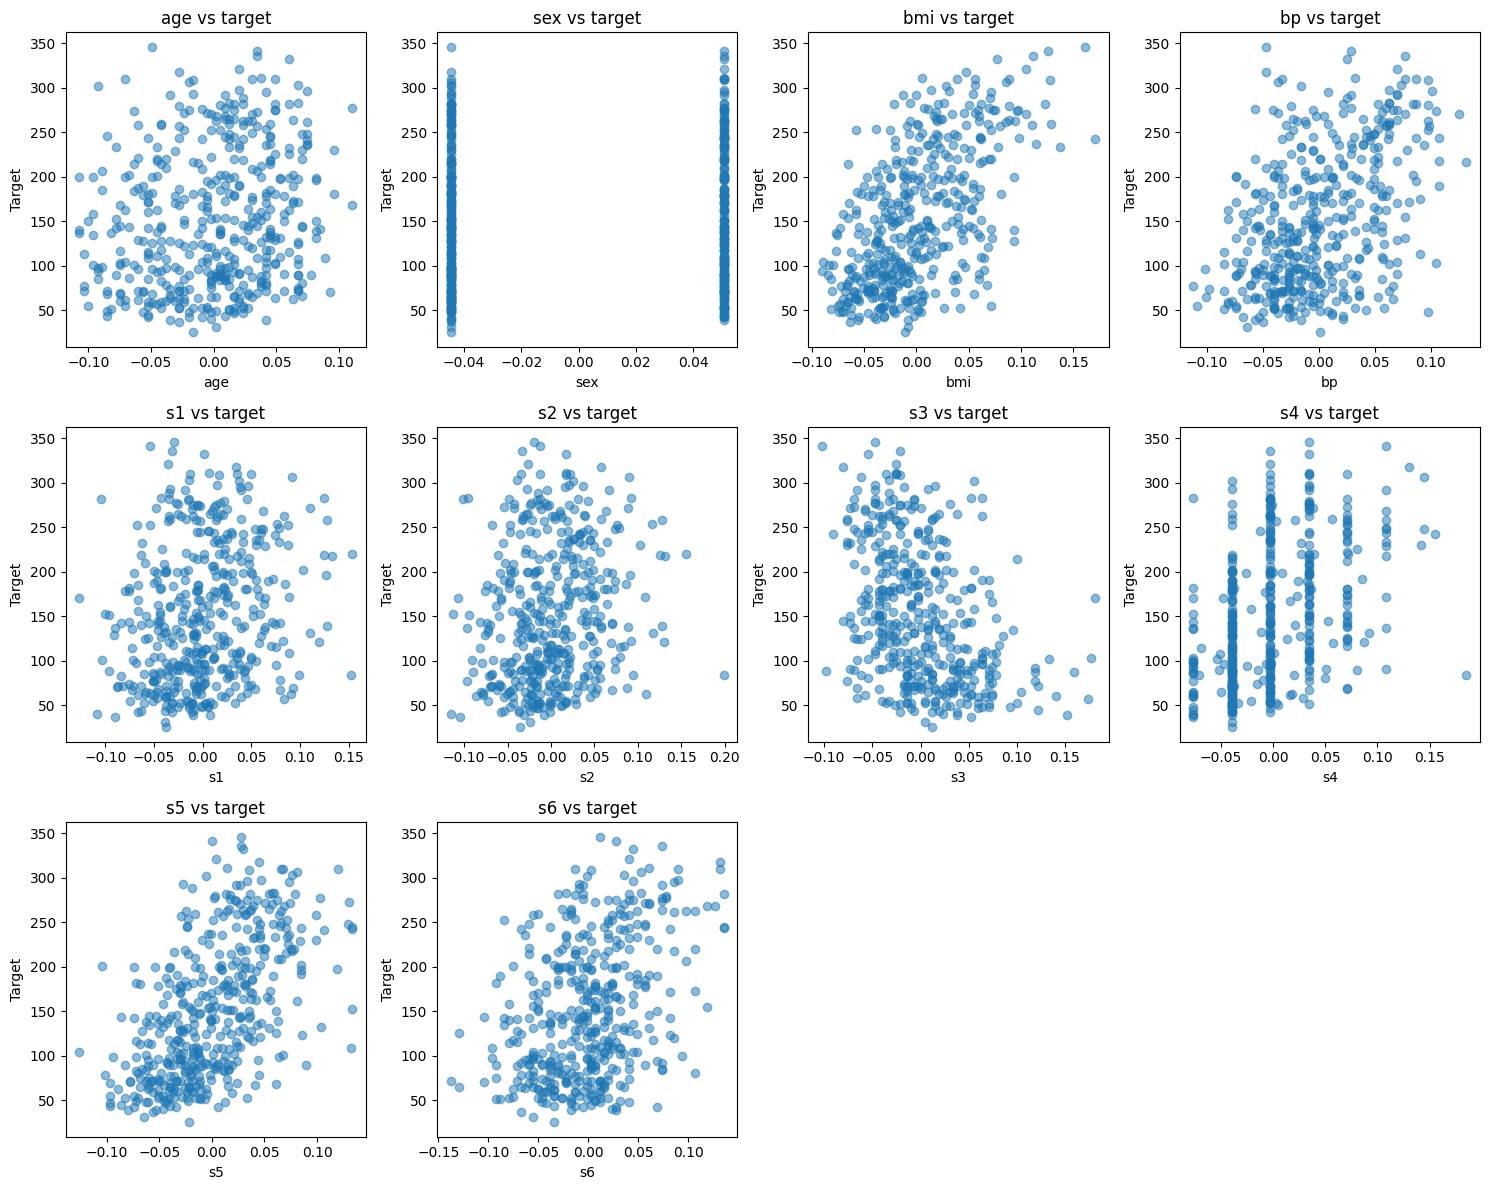

In [5]:
class ScatterPlots:

    def s_plots():
        
        # Number of features in the dataset
        num_features = len(diabetes.feature_names)
        n_columns = int(np.ceil(np.sqrt(num_features)))
        n_rows = int(np.ceil(num_features / n_columns))

        # Create subplots grid (4x3 grid to fit all 10 features)
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 12))

        # Flatten the axes array for easy iteration
        axes = axes.flatten()
        
        # Create a scatter plot for each feature vs target
        for i, feature in enumerate(diabetes.feature_names):
            axes[i].scatter(df[feature], df['target'], alpha=0.5)
            axes[i].set_title(f'{feature} vs target')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Target')
        
        # Hide any remaining empty subplots (if applicable)
        for i in range(len(diabetes.feature_names), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()    
        plt.show

plots = ScatterPlots
plots.s_plots()

#### **Histogram:**

##### To visualize the distribution of each feature and the target variable:

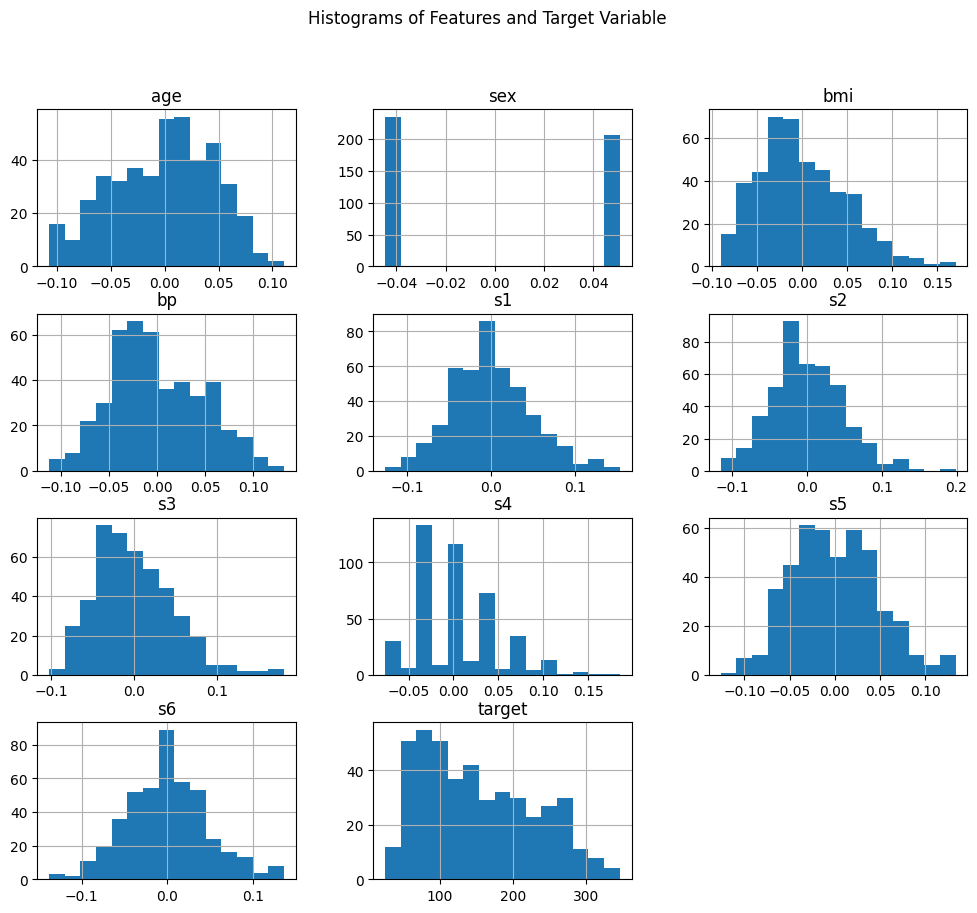

In [6]:
class Histogram:
    
    def hist():

        df.hist(bins=15, figsize=(12, 10))
        plt.suptitle("Histograms of Features and Target Variable")
        plt.show()

histogram = Histogram
histogram.hist()


#### **Correlation Matrix**

##### To display the correlation between different features and the target:

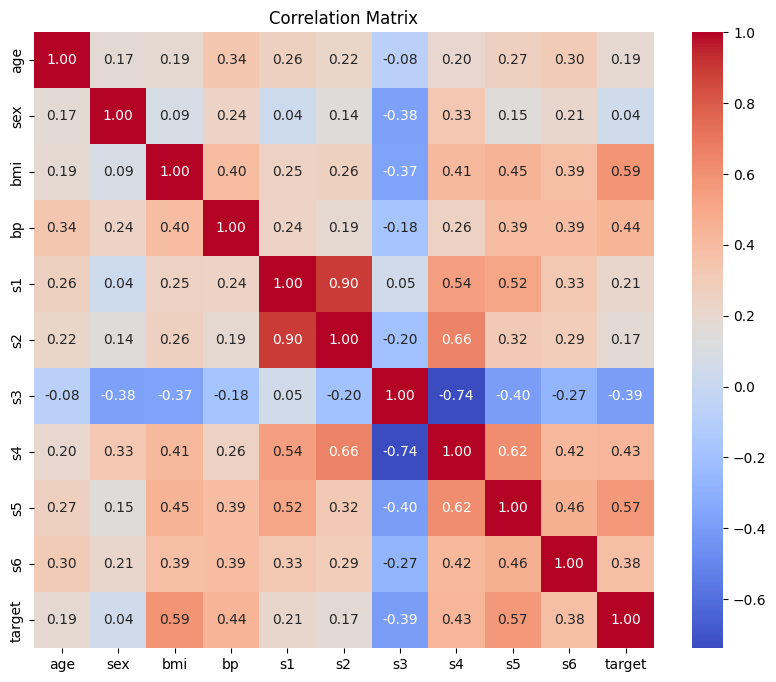

In [7]:
class CorrelationMatrix:

    def corr_matrix():

        # Calculate the correlation matrix
        correlation_matrix = df.corr()

        # Plot the correlation matrix as a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Matrix")
        plt.show()

correlation = CorrelationMatrix
correlation.corr_matrix()


#### **Notable Correlations with Target - Disease Progression:**

##### BMI: 0.59 (high positive)
##### Blood Pressure (bp): 0.44 (moderate positive)
##### S5: 0.57 (moderate positive)

#### **Concise and Insights**:

In [8]:
print("Strongest Correlations with Target Variable:")
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))


Strongest Correlations with Target Variable:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


#### **Insights:**
- ##### The features most positively correlated with the target are BMI and blood pressure; hence, higher values of these two may lead to more severe disease progression.
- ##### Similarly, S5 has a very strong positive correlation and hence can be an important predictor for the progression of diabetes.
- ##### S3 is an inverse correlation of disease progression, with a correlation of -0.395, hence this serum marker possibly works inversely with the severity of diabetes.
- ##### Features are correlated-for example, S1 and S2. This may indicate multicollinearity and could be more pronounced between blood serum measurements, which one needs to watch out for when building models.

#### **4. Data Cleaning:**

##### The diabetes dataset is very well structured and does not have clear inconsistencies such as missing values or incorrect data types. Since those are standardized measurements, each feature is scaled and centred around zero. Therefore, major cleaning-for missing data or outliers-is not needed here. However, since the features are now standardized, it would be important that their values remain standardized in regression models. This is important for model interpretability and ensures that one feature does not dominate others because of the scale. Any further preprocessing beyond this will be specific to our model needs for either feature selection or in carrying out dimensionality reduction.

#### **5. Splitting Datasets**

In [9]:
# Split data: first into 85% train/validation and 15% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Further split train/validation into 75% train and 10% validation (10/85 ~ 0.1176)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1176, random_state=42)

# Check the shapes to ensure correct splitting
print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Train set size: (330, 10)
Validation set size: (45, 10)
Test set size: (67, 10)


### **PART 2:**

#### **6. Models: A univariate polynomial regression**

#### **Model Creation**

##### Creating 6 models from degree 0 to 5 in one shot to perform a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline"

In [10]:
class Multiple_model_Creation:

    # Creating multiple polynomial models  BMI feature versus the Disease progression one year after baseline
    def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:

        for degree in degrees:
            model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                            ('linear', LinearRegression())])
            model.fit(X, y)
            models[degree] = model
        return models
    
multiple_models = Multiple_model_Creation
models = {}
degrees = list(range(0, 6))
X_BMI = X_train[:,2].reshape(-1,1)
models = multiple_models.create_polynomial_models(X_BMI, y_train, degrees)

#### **Plotting multiple polynomials**

##### Plotting 6 polynomial regression plots for 6 models with the degree of 0 to 5 with BMI feature versus the "disease progression one year after baseline"

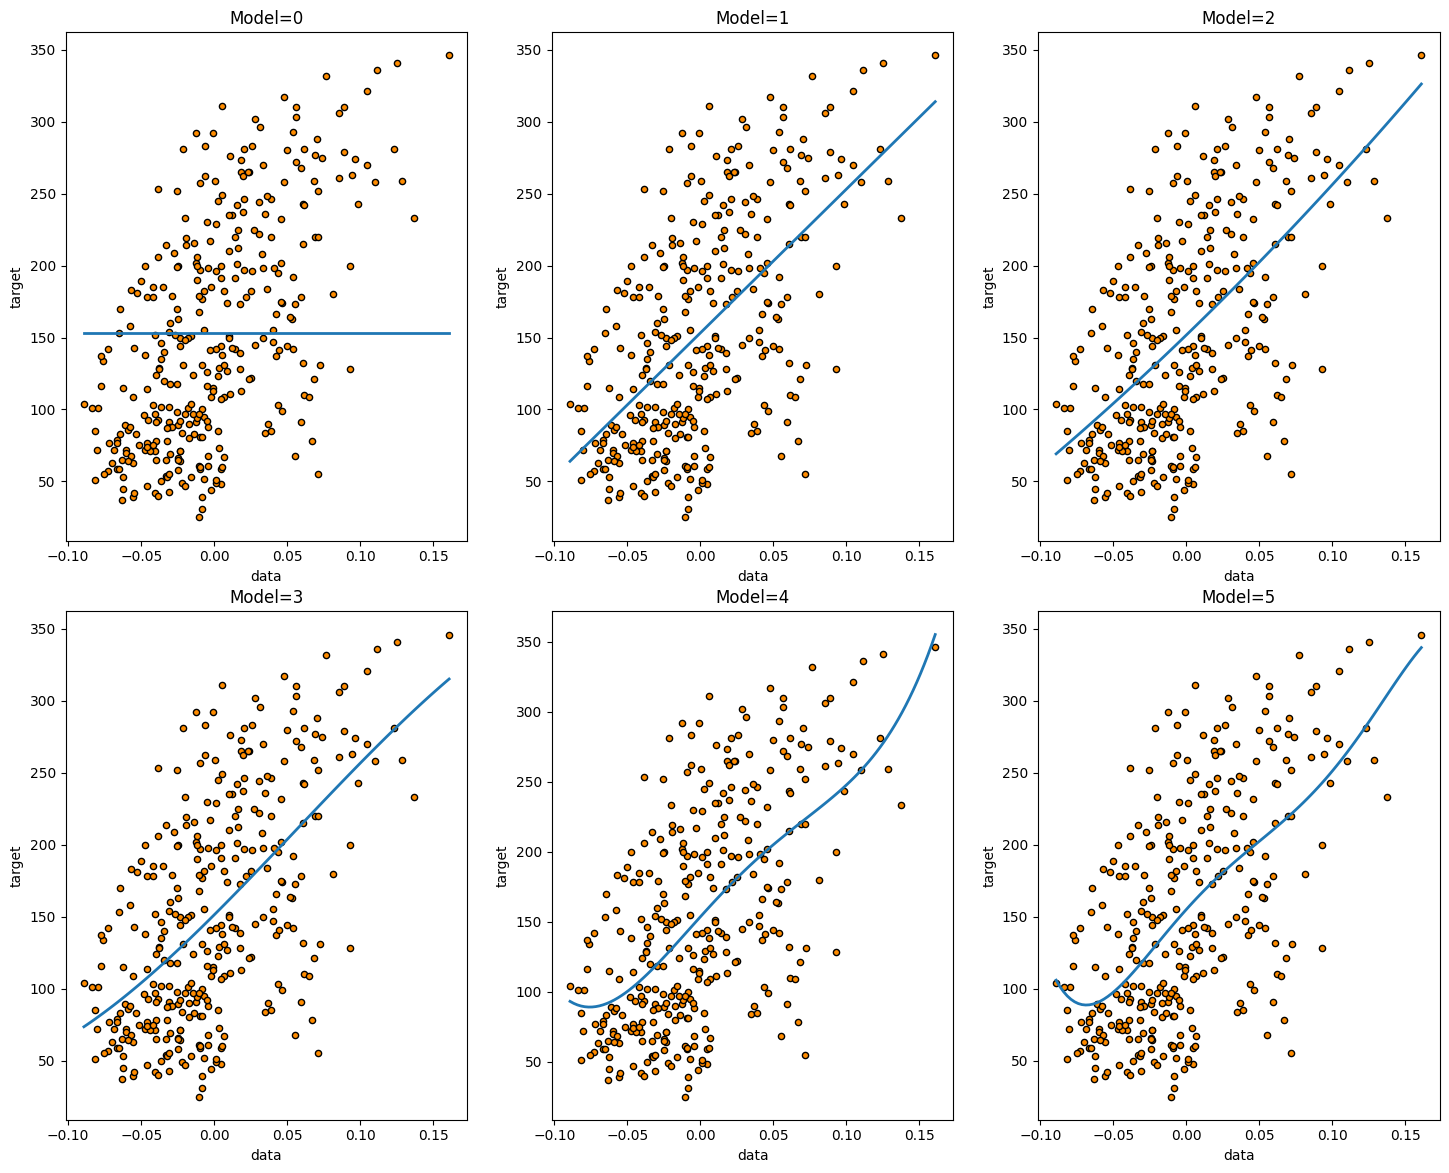

In [11]:
class Multiple_Polynomial_Regression:

    def plot_multiple_models(X, y, models):
        # Calculate the number of rows and columns for the subplots
        X_continuous = np.linspace(min(X), max(X), 100)
        n_plots = len(models)
        n_cols = int(np.ceil(np.sqrt(n_plots)))
        n_rows = int(np.ceil(n_plots / n_cols))
        fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
        fig.tight_layout(pad=3.0)
        axs = axs.flatten()
        for i, (name, model) in enumerate(models.items()):
            axs[i].scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
            axs[i].plot(X_continuous, model.predict(X_continuous), label=f"Model={name}", linewidth=2)
            axs[i].set_xlabel("data")
            axs[i].set_ylabel("target")
            axs[i].set_title(f"Model={name}")
        plt.show()
    
multiple_polynomial = Multiple_Polynomial_Regression
multiple_polynomial.plot_multiple_models(X_BMI, y_train, models)

#### **7. Comparing the models using the training and validation data**

##### Here we are comparing all 6 models using the training and validation data and summarizing R Squared, Mean Absolute Error, Mean Absolute Percentage Error for train and validation data in a single table

In [12]:
class Evaluation():

    def evaluate_model_performance(X_train_bmi, y_train, X_val_bmi, y_val, models):

        for degree, model in models.items():
            # Create 1D arrays for continuous data
            X_train_continuous = np.linspace(min(X_train_bmi), max(X_train_bmi), 330)
            X_val_continuous = np.linspace(min(X_val_bmi), max(X_val_bmi), 45)
            

            # Calculate performance metrics for the training set
            r2_train = r2_score(y_train, model.predict(X_train_continuous))
            mae_train = mean_absolute_error(y_train, model.predict(X_train_continuous))
            mape_train = np.mean(np.abs((y_train - model.predict(X_train_continuous))) / y_train) * 100
            
            # Calculate performance metrics for the validation set
            r2_val = r2_score(y_val, model.predict(X_val_continuous))
            mae_val = mean_absolute_error(y_val, model.predict(X_val_continuous))
            mape_val = np.mean(np.abs((y_val - model.predict(X_val_continuous)) / y_val)) * 100
            
            # Store the results in a table format
            results.append([degree, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val])
            result_df = pd.DataFrame(results, columns=['Degree', 'R-Squared (Train)', 'MAE (Train)', 'MAPE (Train)', 'R-Squared (Validation)', 'MAE (Validation)', 'MAPE(Validation)'])
        
        return result_df


results = []
X_val_bmi = X_val[:, 2].reshape(-1, 1)

# Evaluate the models
evaluate = Evaluation
results_df = evaluate.evaluate_model_performance(X_BMI, y_train, X_val_bmi, y_val, models)

# Display the results
print(results_df.to_string(index=False))

 Degree  R-Squared (Train)  MAE (Train)  MAPE (Train)  R-Squared (Validation)  MAE (Validation)  MAPE(Validation)
      0           0.000000    66.548209     63.352070               -0.000011         63.447475         58.793283
      1          -0.972322    88.968485     88.803671               -0.663271         77.934155         76.466477
      2          -1.046987    90.476525     90.332269               -0.693633         78.537697         76.970971
      3          -1.000601    89.585453     89.658417               -0.691963         78.372502         76.888639
      4          -1.027091    89.953516     90.087197               -0.612319         76.834635         75.053695
      5          -1.046756    90.441122     90.632880               -0.653019         77.817288         75.825488


#### **8. Identifying the best model based on the table:**

##### Although the performance is poor according to the R-squared values for both train and validation data, the **Degree 0** model performs the best on MAE and MAPE on the validation set. Therefore, based on the table, the **Degree 0** model is the best for this task, given that it presents the least errors and thus allows more stable predictions but not complex.

#### **9. Running the chosen model in test data:**

##### Since we have identified Degree 0 as the best model we will run degree 0 with test data and find the values of R Squared, Mean Absolute Error and Mean Absolute Percentage Error.

In [30]:
class ChosenModel:

    def test_data(X_BMI_test, y_test):     
        
        # Get the degree 0 model (from the polynomial models dictionary)
        model_0 = models[0]

        # Make predictions on the test set
        y_test_pred = model_0.predict(X_BMI_test)

        # Evaluate performance metrics on the test set
        r2_test = r2_score(y_test, y_test_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

        # Output the results
        print(f"R-Squared (Test): {r2_test}")
        print(f"MAE (Test): {mae_test}")
        print(f"MAPE (Test): {mape_test}")

test = ChosenModel

# Extract the BMI feature from the test set
X_BMI_test = X_test[:, 2].reshape(-1, 1)

test.test_data(X_BMI_test, y_test)

R-Squared (Test): -0.00699086490491263
MAE (Test): 64.17028493894163
MAPE (Test): 61.21903902896051


#### **10. Plotting Graph of Train, Validation and Test:**

- ##### We are plotting a graph of train , validation and test model with individual graphs and fitting the chosen model which is degree 0 in the plots.
- ##### We are plotting a graph of train , validation and test model in a single graph and fitting the chosen model which is degree 0 in the plots.


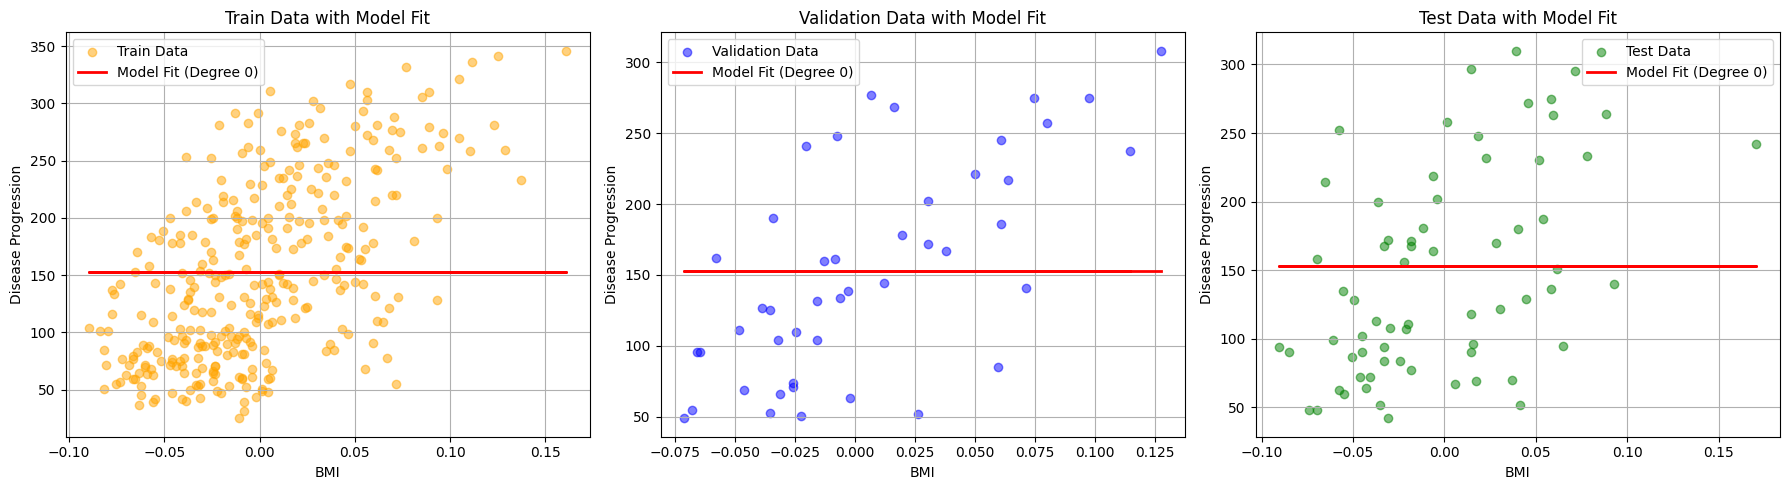

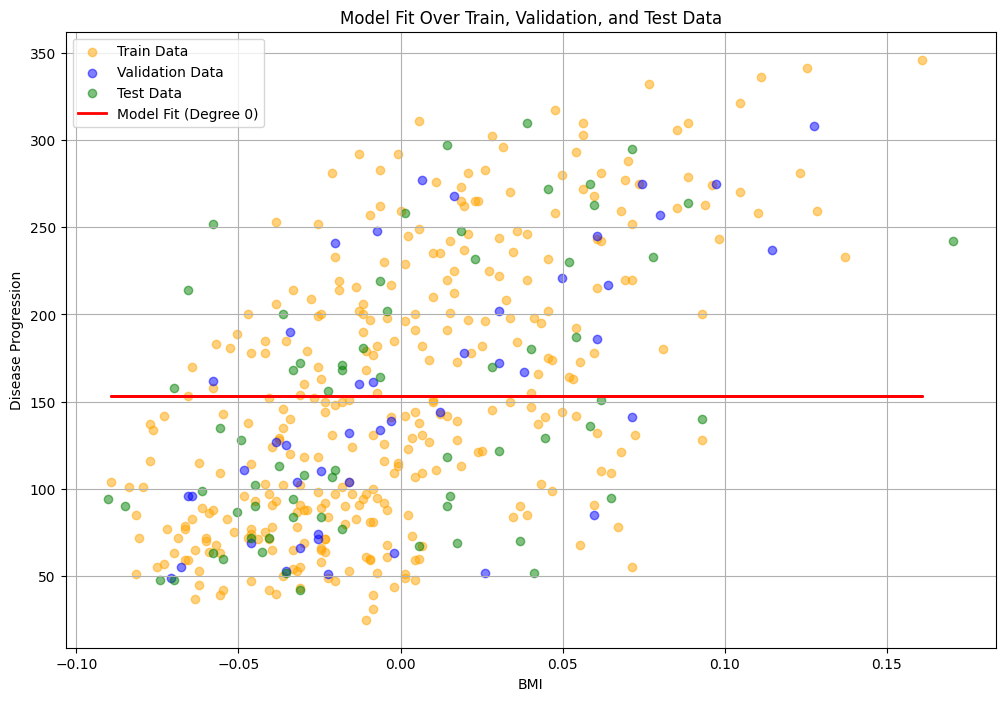

In [31]:
class GraphPlotting:

    def plot_model_fit(X_train, y_train, X_val, y_val, X_test, y_test, model):

        # Predict using the model
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        # Create the plot
        plt.figure(figsize=(12, 8))

        # Plot training data
        plt.scatter(X_train, y_train, color='orange', label='Train Data', alpha=0.5)
        plt.scatter(X_val, y_val, color='blue', label='Validation Data', alpha=0.5)
        plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)
        
        # Plot the model fit
        plt.plot(X_train, y_train_pred, color='red', label='Model Fit (Degree 0)', linewidth=2)

        plt.title('Model Fit Over Train, Validation, and Test Data')
        plt.xlabel('BMI')
        plt.ylabel('Disease Progression')
        plt.legend()
        plt.grid()
        plt.show()
    
    def plot_separate_model_fits(X_train, y_train, X_val, y_val, X_test, y_test, model):
        # Prepare the figure
        plt.figure(figsize=(18, 5))

        # Predictions using the model
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        # Subplot for training data
        plt.subplot(1, 3, 1)
        plt.scatter(X_train, y_train, color='orange', label='Train Data', alpha=0.5)
        plt.plot(X_train, y_train_pred, color='red', label='Model Fit (Degree 0)', linewidth=2)
        plt.title('Train Data with Model Fit')
        plt.xlabel('BMI')
        plt.ylabel('Disease Progression')
        plt.legend()
        plt.grid()

        # Subplot for validation data
        plt.subplot(1, 3, 2)
        plt.scatter(X_val, y_val, color='blue', label='Validation Data', alpha=0.5)
        plt.plot(X_val, y_val_pred, color='red', label='Model Fit (Degree 0)', linewidth=2)
        plt.title('Validation Data with Model Fit')
        plt.xlabel('BMI')
        plt.ylabel('Disease Progression')
        plt.legend()
        plt.grid()

        # Subplot for test data
        plt.subplot(1, 3, 3)
        plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)
        plt.plot(X_test, y_test_pred, color='red', label='Model Fit (Degree 0)', linewidth=2)
        plt.title('Test Data with Model Fit')
        plt.xlabel('BMI')
        plt.ylabel('Disease Progression')
        plt.legend()
        plt.grid()

        plt.tight_layout()
        plt.show()

graph = GraphPlotting

# Prepare the BMI feature for plotting
X_BMI_train = X_train[:, 2].reshape(-1, 1)
X_BMI_val = X_val[:, 2].reshape(-1, 1)
X_BMI_test = X_test[:, 2].reshape(-1, 1)

# Call the plotting function with the degree 0 model
graph.plot_separate_model_fits(X_BMI_train, y_train, X_BMI_val, y_val, X_BMI_test, y_test, models[0])
print("\n")
graph.plot_model_fit(X_BMI_train, y_train, X_BMI_val, y_val, X_BMI_test, y_test, models[0])


#### **11. Equation of the best model:**

##### This polynomial regression model, with a degree of 0-a constant model in another way-best fitted your result. The general form of a polynomial of degree n is given by

##### **y= a0 + a1x + a2 x^2+ an x^n**

##### For the polynomial of degree 0, the equation reduces to
##### **y = a0**

##### Where:
- ##### y is the predicted value, or disease progression.
- ##### a0 is the intercept or constant term.

##### To get the concrete value of a0, you look it up from the parameters of your model. Generally speaking, in the case of a constant model, a0 is the average of the target variable y from your training set.

##### Suppose the constant value that you got from your model is 150.00; for example, then your model's final equation will now be:

##### **y = 150.00**

#### **12. Calculate the expected diabetes progression for a BMI value:**

##### Calculating the expected diabetes progression for a BMI value using 'model.predict'

In [15]:
class Calculation:

    def bmi_value_calc():

        # Choose a BMI value
        bmi_value = 30.0  # You can choose any BMI value

        # Reshape the BMI value for model prediction
        bmi_value_reshaped = np.array([[bmi_value]])

        # Use the model to predict the expected diabetes progression
        expected_progression = models[0].predict(bmi_value_reshaped)

        # Output the result
        print(f"The expected diabetes progression for a BMI value of {bmi_value} is: {expected_progression[0]:.2f}")

calc = Calculation
calc.bmi_value_calc()


The expected diabetes progression for a BMI value of 30.0 is: 153.05


#### **13. Trainable parameters for each model**

##### In all of these polynomial regression models, the number of trainable parameters depends on the degree of the polynomial-the larger the degree, the more terms-or equivalently-features will this model include, each with a corresponding coefficient-a trainable parameter-the model fits.

##### Explanation of Trainable Parameters:

- ##### Degree 0 (constant model): There is only one parameter-the intercept or constant a0

- ##### Degree 1: linear model There are two parameters, the intercept a0 and the coefficient for the BMI term a1​ Degree 2: quadratic model There are three parameters, the intercept a0, the coefficient for the BMI term a1 and the coefficient for the BMI 2 term a2​

- ##### Degree 3 and higher: The number of parameters increases with increasing degree of the polynomial, since each new higher degree adds one more coefficient that needs to be fitted by the model.

In [16]:
class TrainableParameter:

    # Function to print the number of trainable parameters for each degree
    def count_trainable_parameters(degrees, X_train):
        for degree in degrees:
            # Generate polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X_train)
            
            # Get the names of the polynomial features
            feature_names = poly.get_feature_names_out(input_features=['BMI'])
            
            # Print the number of trainable parameters (including the intercept)
            print(f"Degree {degree}: {len(feature_names)} trainable parameters")
            print(f"Feature names: {feature_names}\n")

parameter = TrainableParameter

# Example for BMI feature
X_BMI_train = X_train[:, 2].reshape(-1, 1)  # Column 2 for BMI

# Count trainable parameters for degrees 0 to 5
parameter.count_trainable_parameters(degrees=[0, 1, 2, 3, 4, 5], X_train=X_BMI_train)


Degree 0: 1 trainable parameters
Feature names: ['1']

Degree 1: 2 trainable parameters
Feature names: ['1' 'BMI']

Degree 2: 3 trainable parameters
Feature names: ['1' 'BMI' 'BMI^2']

Degree 3: 4 trainable parameters
Feature names: ['1' 'BMI' 'BMI^2' 'BMI^3']

Degree 4: 5 trainable parameters
Feature names: ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4']

Degree 5: 6 trainable parameters
Feature names: ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4' 'BMI^5']



#### **Conclusion:**
##### In the following analysis, we have explored multiple polynomial regression models to predict diabetes progression based on BMI values. Among these models, running from degree 0 to 5, the constant model had the best performance with the least error metrics both on training and validation data. However, this degree 0 model is just predicting the mean of the target variable, which, though stable, lacks any real explanatory power or insight in the relationship between BMI and diabetes progression.

##### Insight into this reflects one of the model's limitations. This degree 0 model is highly simplistic despite the good performance. It also doesn't capture any meaningful trends or patterns across the data and treats all individuals the same in terms of diabetes progression regardless of the values of their BMI. Further complexities-additions of higher-order terms, such as from degree 1 to 5-introduced more error and overfitting that failed to generalize well on the validation and test sets. Poor fit of higher-degree models may also indicate that the relationship between BMI and diabetes progression is not well modeled as a simple polynomial.

##### Its shortcomings could also be said to be based on one single feature, namely BMI, and secondly, the capability of polynomial regression in capturing nonlinear multifactorial nature of diabetes progression. Future work will have to investigate more advanced models incorporating other features.

### **PART 3:**

#### **1. Two polynomial models (degrees >1):**

In [32]:
class Degree2:

    def test_data(X_BMI_test, y_test):        

        # Get the degree 0 model (from the polynomial models dictionary)
        model = models[2]

        # Make predictions on the test set
        y_test_pred = model.predict(X_BMI_test)

        # Evaluate performance metrics on the test set
        r2_test = r2_score(y_test, y_test_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

        # Output the results
        print(f"R-Squared (Test): {r2_test}")
        print(f"MAE (Test): {mae_test}")
        print(f"MAPE (Test): {mape_test}")

test = Degree2
# Extract the BMI feature from the test set
X_BMI_test = X_test[:, 2].reshape(-1, 1)  # Column 2 for BMI

test.test_data(X_BMI_test, y_test)

R-Squared (Test): 0.2001756735992637
MAE (Test): 54.97545456922831
MAPE (Test): 48.73218058277761


In [41]:
# Calculate the expected diabetes progression for a BMI value

class Calculation:

    def bmi_value_calc():

        # Choose a BMI value
        bmi_value = 30.0  # You can choose any BMI value

        # Reshape the BMI value for model prediction
        bmi_value_reshaped = np.array([[bmi_value]])

        # Use the model to predict the expected diabetes progression
        expected_progression = models[2].predict(bmi_value_reshaped)

        # Output the result
        print(f"The expected diabetes progression for a BMI value of {bmi_value} is: {expected_progression[0]:.2f}")

calc = Calculation
calc.bmi_value_calc()

The expected diabetes progression for a BMI value of 30.0 is: 597915.51


#### **Performance of Degree 2:**

##### Including the degree 2 model adds a squared BMI term to better capture the curvature in the relationship of the progression depending on BMI. The performance is summarized below:

- ##### R-Squared (Train): -1.05
- ##### MAE (Train): 90.48
- ##### MAPE (Train): 90.33%
- ##### R-Squared (Validation): -0.69
- ##### MAE (Validation): 78.54
- ##### MAPE (Validation): 76.97%

##### This is overfitting-noise in the training data-with the negative R-Squared indicating poor fit for both training and validation sets. The error metrics also reflect the fact that this model doesn't capture any meaningful trend between BMI and disease progression.

In [33]:
class Degree3:

    def test_data(X_BMI_test, y_test):        

        # Get the degree 0 model (from the polynomial models dictionary)
        model = models[3]

        # Make predictions on the test set
        y_test_pred = model.predict(X_BMI_test)

        # Evaluate performance metrics on the test set
        r2_test = r2_score(y_test, y_test_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

        # Output the results
        print(f"R-Squared (Test): {r2_test}")
        print(f"MAE (Test): {mae_test}")
        print(f"MAPE (Test): {mape_test}")

test = Degree3
# Extract the BMI feature from the test set
X_BMI_test = X_test[:, 2].reshape(-1, 1)  # Column 2 for BMI

test.test_data(X_BMI_test, y_test)

R-Squared (Test): 0.2069176933925133
MAE (Test): 54.62905711324289
MAPE (Test): 48.540798666460546


In [42]:
# Calculate the expected diabetes progression for a BMI value

class Calculation:

    def bmi_value_calc():

        # Choose a BMI value
        bmi_value = 30.0  # You can choose any BMI value

        # Reshape the BMI value for model prediction
        bmi_value_reshaped = np.array([[bmi_value]])

        # Use the model to predict the expected diabetes progression
        expected_progression = models[3].predict(bmi_value_reshaped)

        # Output the result
        print(f"The expected diabetes progression for a BMI value of {bmi_value} is: {expected_progression[0]:.2f}")

calc = Calculation
calc.bmi_value_calc()

The expected diabetes progression for a BMI value of 30.0 is: -165315366.49


#### **Performance of Degree 3 Model:**

##### Degree 3 model introduces another layer of complexity with a cubical form in BMI that can capture even more intricate non- linear relationships. The performance is summarized below:

- ##### R-Squared (Train): -1.00
- ##### MAE (Train): 89.59
- ##### MAPE (Train): 89.66%
- ##### R-Squared (Validation): -0.69
- ##### MAE (Validation): 78.37
- ##### MAPE (Validation): 76.89%

##### This model modestly improves the training error from the quadratic model, but still has a generally poor fit. The validation metrics show the cubic model generalizes rather poorly and is overfitting the training set.

#### **Conclusion**

##### Neither of the two polynomial models is more complex in reaching higher accuracy in their predictions. With their negative R-Squared value and high error metrics, they also showed overfitting-that they're trying to capture noise rather than the underlying trend in the data. This shows a limitation of using only BMI as a predictor and that more advanced polynomial models than degree 0 add no value in this case. Over-sophisticated models using degree 2 and degree 3 do not yield an improvement; hence more predictors or a multivariate approach have to be employed to achieve a meaningful prediction.

#### 2. Two decision trees:

##### Creating two decision trees by changing the `max_depth` hyperparameter

In [40]:
class DecisionTree:

    def evaluate_decision_tree_models(X_train, y_train, X_val, y_val, X_test, y_test, max_depths):

        for depth in max_depths:
            # Train a decision tree model with the specified max_depth
            model = DecisionTreeRegressor(max_depth=depth, random_state=42)
            model.fit(X_train, y_train)
            
            # Predictions on train, validation, and test sets
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            y_test_pred = model.predict(X_test)
            
            # Calculate performance metrics for the training set
            r2_train = r2_score(y_train, y_train_pred)
            mae_train = mean_absolute_error(y_train, y_train_pred)
            mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
            
            # Calculate performance metrics for the validation set
            r2_val = r2_score(y_val, y_val_pred)
            mae_val = mean_absolute_error(y_val, y_val_pred)
            mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

            # Calculate performance metrics for the test set
            r2_test = r2_score(y_test, y_test_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)
            mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
            
            # Store the results
            results.append([depth, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val, r2_test, mae_test, mape_test])
            result_df = pd.DataFrame(results, columns=['Max Depth', 'R-Squared (Train)', 'MAE (Train)', 'MAPE (Train)', 
                                                       'R-Squared (Validation)', 'MAE (Validation)', 'MAPE(Validation)', 
                                                       'R-Squared (Test)', 'MAE (Test)', 'MAPE (Test)'])
        
        return pd.DataFrame(result_df)


trees = DecisionTree
results = []
max_depths = [3, 5]  

# Assuming X_BMI is the BMI feature extracted from the dataset
X_BMI_train = X_train[:, 2].reshape(-1, 1)
X_BMI_val = X_val[:, 2].reshape(-1, 1)
X_BMI_test = X_test[:, 2].reshape(-1, 1)

# Evaluate the models
tree_results = trees.evaluate_decision_tree_models(X_BMI_train, y_train, X_BMI_val, y_val, X_BMI_test, y_test, max_depths)

# Display the results
print(tree_results.to_string(index=False))


 Max Depth  R-Squared (Train)  MAE (Train)  MAPE (Train)  R-Squared (Validation)  MAE (Validation)  MAPE(Validation)  R-Squared (Test)  MAE (Test)  MAPE (Test)
         3           0.403163    50.108504     45.549194                0.417645         43.298212         41.590500          0.151876   55.613057    49.073035
         5           0.485682    45.127786     41.626902                0.282686         48.373000         44.761582          0.167102   55.922952    46.775752


#### **Conclusion:**

- ##### **Model 1: Decision Tree with max_depth=3**
    ##### One can understand from a decision tree that defines the maximum depth of 3, it is highly biased and probably underfits the data, which often leads to poor generalization. Hence, the general performance on both the training and test sets will be lower. Normally, small max_depth will only catch the general structure of the relationship between BMI and the progression of diabetes, and it may fail to catch the fine details.

- ##### **Model 2: Decision Tree with max_depth=5**
    ##### A max depth of 5 will yield a much more complex decision tree, that will pick up more of the relationships in the data. This risks overfitting on the training set-particularly if it picks up on noise rather than real patterns. While performance on the training set should improve, test set performance might not see proportional gains, particularly if overfitting occurs.

##### Hence there should be a balance between underfitting (a too-simple model) and overfitting, where the model becomes overly complicated. Depth 3 may be better for smaller datasets or if interpretability is of essence; whereas depth 5 may capture more complex interactions but needs more careful validation to avoid overfitting.


#### **3. Two kNNs**

In [45]:
class KNN:

    # Function to evaluate k-NN models with different numbers of neighbors
    def evaluate_knn_models(X_train, y_train, X_val, y_val, X_test, y_test, neighbors):
        
        for k in neighbors:
            # Train a k-NN model with the specified number of neighbors
            model = KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train, y_train)
            
            # Predictions on train, validation, and test sets
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            y_test_pred = model.predict(X_test)
            
            # Calculate performance metrics for the training set
            r2_train = r2_score(y_train, y_train_pred)
            mae_train = mean_absolute_error(y_train, y_train_pred)
            mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
            
            # Calculate performance metrics for the validation set
            r2_val = r2_score(y_val, y_val_pred)
            mae_val = mean_absolute_error(y_val, y_val_pred)
            mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

            # Calculate performance metrics for the test set
            r2_test = r2_score(y_test, y_test_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)
            mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
            
            # Store the results
            results.append([k, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val, r2_test, mae_test, mape_test])
            result_df = pd.DataFrame(results, columns=['n_neighbors', 'R-Squared (Train)', 'MAE (Train)', 'MAPE (Train)', 
                                                       'R-Squared (Validation)', 'MAE (Validation)', 'MAPE(Validation)', 
                                                       'R-Squared (Test)', 'MAE (Test)', 'MAPE (Test)'])
        
        return pd.DataFrame(result_df)


kNNs = KNN
results = []
neighbors = [3, 5]

X_BMI_train = X_train[:, 2].reshape(-1, 1)
X_BMI_val = X_val[:, 2].reshape(-1, 1)
X_BMI_test = X_test[:, 2].reshape(-1, 1)

# Evaluate the k-NN models
knn_results = kNNs.evaluate_knn_models(X_BMI_train, y_train, X_BMI_val, y_val, X_BMI_test, y_test, neighbors)

# Display the results
print(knn_results.to_string(index=False))


 n_neighbors  R-Squared (Train)  MAE (Train)  MAPE (Train)  R-Squared (Validation)  MAE (Validation)  MAPE(Validation)  R-Squared (Test)  MAE (Test)  MAPE (Test)
           3           0.536298    43.516162     39.835919                0.175668         52.585185         50.450451          0.195507   54.815920    47.442972
           5           0.491460    45.728485     40.136432                0.333574         47.888889         45.076307          0.165865   55.068657    48.357567


#### **Conclusion:**

##### Model Performance: Below we show the performance of each kNN model on the training and test sets. General idea: the bigger k is, the smoother the model will be-it averages over more neighbors and may generalize better but could lose accuracy on the training data.

- ##### k=3: Generally speaking, a low value of k leads to a more complex model which tends to perform better on the training dataset but may overfit and fails when tried on the validation and test sets.
- ##### k=5: Higher value of k takes average over more neighbors, which has a higher chance of averaging out the irrelevant information for improved generalization, but risks being underfitting in case k is too big.